In [ ]:
#!pip install geopandas

In [24]:
import pandas as pd

import matplotlib.pyplot as plt

import geopandas as gpd




In [2]:
c02 = pd.read_csv('../datasets/airtrans_c02.csv')

C:\Users\muham\AppData\Local\Temp\ipykernel_37328\856862369.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  c02 = pd.read_csv('../datasets/airtrans_c02.csv')


In [3]:
c02.shape

(334593, 19)

In [4]:
c02.head()

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2015,2015,7.351698e+06,NaN,NaN
1,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2016,2016,7.415273e+06,NaN,NaN
2,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2017,2017,7.333902e+06,NaN,NaN
3,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2018,2018,7.320473e+06,NaN,NaN
4,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",NSA,Non seasonally adjusted,2019,2019,7.753970e+06,NaN,NaN


In [5]:
c02.tail()

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
334588,GEO,Georgia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,RES_INT_OUT,"""(F) - International flight outside of country...",NSA,Non seasonally adjusted,2023-06,Jun-2023,8.41529,NaN,NaN
334589,GEO,Georgia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,RES_TOTAL,Air transport - Industry H51 (ISIC rev.4): (A)...,NSA,Non seasonally adjusted,2023-06,Jun-2023,8.41529,NaN,NaN
334590,GEO,Georgia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,RES_ABROAD,Bridging item - Residents abroad: (B)+(D)+(E)+(F),NSA,Non seasonally adjusted,2023-06,Jun-2023,8.41529,NaN,NaN
334591,MHL,Marshall Islands,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,NRES_INT_FROM,"""(G) - International flight departing from cou...",NSA,Non seasonally adjusted,2023-06,Jun-2023,35.29190,NaN,NaN
334592,MHL,Marshall Islands,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,TER_INT,International aviation (memo item): (D)+(G),NSA,Non seasonally adjusted,2023-06,Jun-2023,35.29190,NaN,NaN


In [6]:
c02.dtypes

LOCATION                object
Country                 object
POLLUTANT               object
Pollutant               object
MEASURE                 object
Measure                 object
FLIGHT                  object
Flight type             object
FREQUENCY               object
Frequency               object
SOURCE                  object
Source of emissions     object
SEASONALITY             object
Seasonality             object
TIME                    object
Time                    object
Value                  float64
Flag Codes             float64
Flags                  float64
dtype: object

In [7]:
c02['SOURCE'].value_counts()

TER_INT          39640
NRES_INT_FROM    39078
RES_TOTAL        31346
RES_ABROAD       30452
RES_INT_OUT      26418
RES_DOM_OUT      26339
RES_INT_TO       26302
RES_INT_FROM     26157
TER_DOM          25702
RES_DOM_IN       22071
NRES_DOM_IN      20544
NRES_TERR        20544
Name: SOURCE, dtype: int64

In [8]:
c02['Source of emissions'].value_counts()

International aviation (memo item): (D)+(G)                                                                        39640
"(G) - International flight departing from country A, operated by an airline that is non-resident in country A"    39078
Air transport - Industry H51 (ISIC rev.4): (A)+(B)+(D)+(E)+(F)                                                     31346
Bridging item - Residents abroad: (B)+(D)+(E)+(F)                                                                  30452
"(F) - International flight outside of country A, operated by a resident airline of country A"                     26418
"(B) - Domestic flight outside of country A, operated by a resident airline of country A"                          26339
"(E) - International flight arriving in country A, operated by a resident airline of country A"                    26302
"(D) - International flight departing from country A, operated by a resident airline of country A"                 26157
Domestic aviation: (A)+(C)      

In [9]:
c02_ter = c02[(c02['SOURCE'] == 'TER_INT') | (c02['SOURCE'] == 'TER_DOM')]

In [10]:
c02_ter.tail()

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
334576,ALB,Albania,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,P,Passenger flights,M,Monthly,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2023-05,May-2023,14.98480,NaN,NaN
334580,BIH,Bosnia and Herzegovina,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,Q,Quarterly,TER_INT,International aviation (memo item): (D)+(G),NSA,Non seasonally adjusted,2023-Q2,Q2-2023,9.18504,NaN,NaN
334585,MHL,Marshall Islands,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,Q,Quarterly,TER_INT,International aviation (memo item): (D)+(G),NSA,Non seasonally adjusted,2023-Q2,Q2-2023,35.29190,NaN,NaN
334587,BIH,Bosnia and Herzegovina,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,TER_INT,International aviation (memo item): (D)+(G),NSA,Non seasonally adjusted,2023-06,Jun-2023,9.18504,NaN,NaN
334592,MHL,Marshall Islands,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,C,Freight flights,M,Monthly,TER_INT,International aviation (memo item): (D)+(G),NSA,Non seasonally adjusted,2023-06,Jun-2023,35.29190,NaN,NaN


In [11]:
c02_ter.head()

,LOCATION,Country,POLLUTANT,Pollutant,MEASURE,Measure,FLIGHT,Flight type,FREQUENCY,Frequency,SOURCE,Source of emissions,SEASONALITY,Seasonality,TIME,Time,Value,Flag Codes,Flags
80,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2015,2015,7.395764e+06,NaN,NaN
81,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2016,2016,7.463633e+06,NaN,NaN
82,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2017,2017,7.386456e+06,NaN,NaN
83,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2018,2018,7.375074e+06,NaN,NaN
84,AUS,Australia,CO2,Carbon dioxide,TCO2,tonnes of CO2-equivalent,TOTAL,All flights,A,Annual,TER_DOM,Domestic aviation: (A)+(C),NSA,Non seasonally adjusted,2019,2019,7.960830e+06,NaN,NaN


In [12]:
c02_ter['Source of emissions'].value_counts()

International aviation (memo item): (D)+(G)    39640
Domestic aviation: (A)+(C)                     25702
Name: Source of emissions, dtype: int64

In [13]:
c02_ter.shape

(65342, 19)

In [14]:
c02_ter.to_csv('../datasets/territory_principle.csv', index=False)

## For intial visualization

Finding unique Countries

In [15]:
c02_ter['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Afghanistan',
       'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cabo Verde', 'Central African Republic',
       'Chad', 'Chile', "China (People's Republic of)", 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', "Democratic People's Re

In [23]:
c02_ter['Country'].value_counts()



United Kingdom                           482
Australia                                480
Japan                                    480
Indonesia                                480
India                                    480
                                        ... 
Yemen                                     94
South Sudan                               93
Democratic People's Republic of Korea     50
Lesotho                                    8
Eswatini                                   8
Name: Country, Length: 185, dtype: int64

In [31]:
grouped_country_values = c02_ter.groupby('Country').agg({'Value': 'sum'}).reset_index() # Country and summing Values
grouped_country_values


,Country,Value
0,Afghanistan,3.952507e+06
1,Albania,4.763342e+06
2,Algeria,2.253589e+07
3,Angola,1.354253e+07
4,Antigua and Barbuda,4.390593e+06
...,...,...
180,Venezuela,1.277873e+07
181,Viet Nam,1.905645e+08
182,Yemen,9.128696e+05
183,Zambia,5.239726e+06


Using build in data set from geopanda

In [25]:
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\muham\AppData\Local\Temp\ipykernel_37328\509156995.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

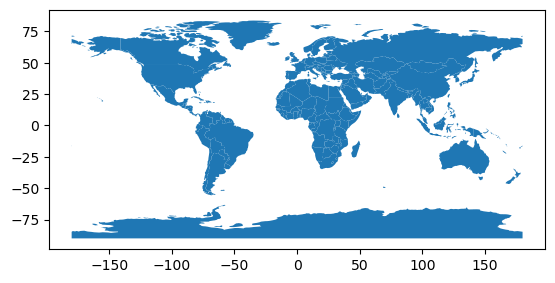

In [26]:
world_data.plot()

In [27]:
world_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [42]:
world_data.info

<bound method DataFrame.info of          pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

       

Merging wold data and grouped data

In [32]:
merged_worlddata_grouped = world_data.merge(grouped_country_values, left_on='name', right_on='Country', how='left')

In [ ]:
merged_worlddata_grouped['Value'].fillna(0, inplace=True) #if any

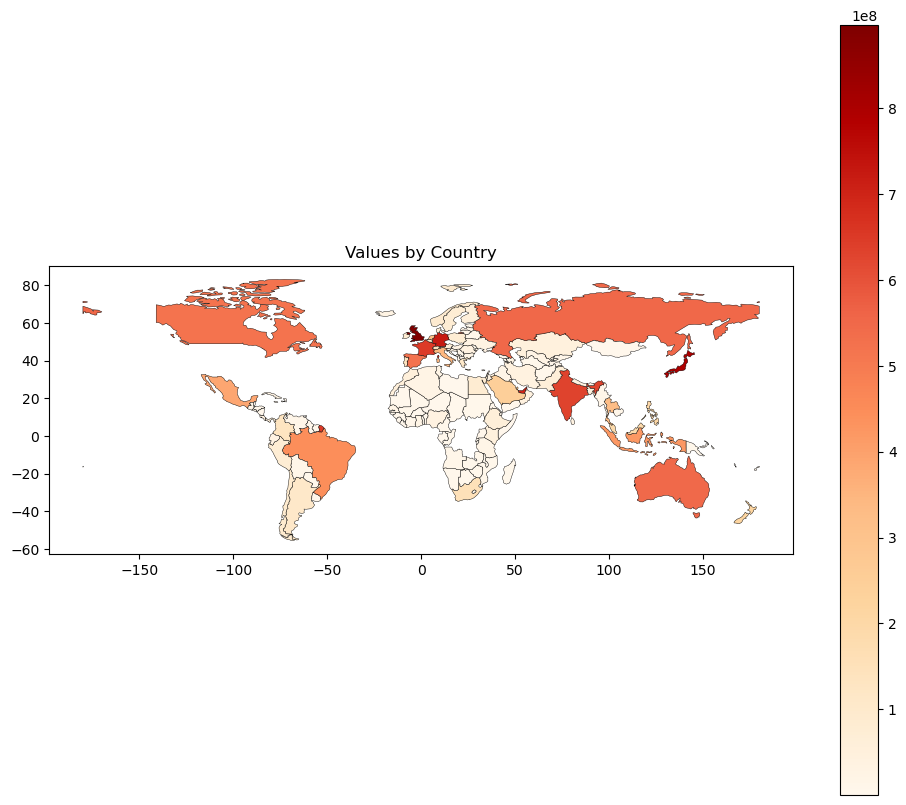

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_worlddata_grouped.plot(column='Value', ax=ax, legend=True, cmap='OrRd', edgecolor='k', linewidth=0.3)
ax.set_title('Values by Country')
plt.show()


United States needs to be renamed to United States of America or vice versa. A common issue while merging geospatial data.

In [41]:
merged_worlddata_grouped[['name', 'Country']] 

,name,Country
0,Fiji,Fiji
1,Tanzania,Tanzania
2,W. Sahara,NaN
3,Canada,Canada
4,United States of America,NaN
...,...,...
172,Serbia,Serbia
173,Montenegro,Montenegro
174,Kosovo,NaN
175,Trinidad and Tobago,Trinidad and Tobago


In [76]:

missing = merged_worlddata_grouped[merged_worlddata_grouped['name'] != merged_worlddata_grouped['Country']]
missing.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Value
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",NaN,NaN
17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",NaN,NaN
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",NaN,NaN


In [72]:
missing_list = missing['name'].tolist()


In [73]:
missing_list

['W. Sahara',
 'United States of America',
 'Dem. Rep. Congo',
 'Dominican Rep.',
 'Bahamas',
 'Falkland Is.',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Timor-Leste',
 'Puerto Rico',
 'Central African Rep.',
 'Eq. Guinea',
 'eSwatini',
 'Palestine',
 'Gambia',
 'Laos',
 'Vietnam',
 'North Korea',
 'South Korea',
 'Syria',
 'Turkey',
 'New Caledonia',
 'Solomon Is.',
 'China',
 'Taiwan',
 'Brunei',
 'Slovakia',
 'Czechia',
 'Antarctica',
 'N. Cyprus',
 'Somaliland',
 'Bosnia and Herz.',
 'Kosovo',
 'S. Sudan']

Lets try a different aproch

In [77]:
grouped_loc_values = c02_ter.groupby('LOCATION').agg({'Value': 'sum'}).reset_index() # Country and summing Values

In [81]:
merged_worlddata_grouped_loc = world_data.merge(grouped_loc_values, left_on='iso_a3', right_on='LOCATION', how='left')

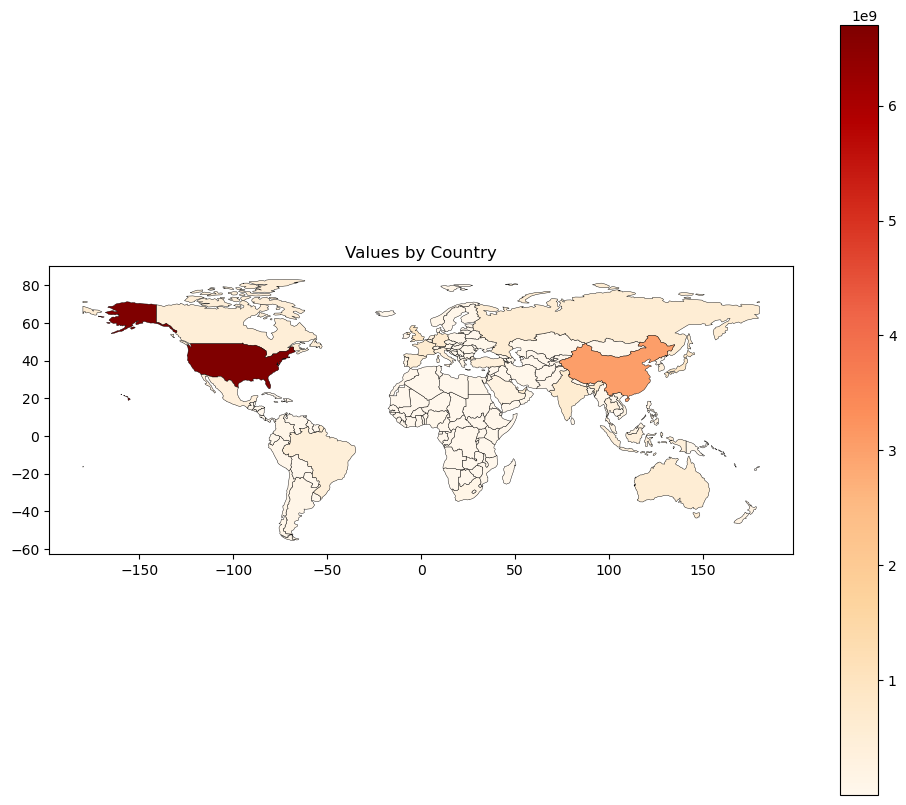

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_worlddata_grouped_loc.plot(column='Value', ax=ax, legend=True, cmap='OrRd', edgecolor='k', linewidth=0.3)
ax.set_title('Values by Country')
plt.show()

It is intresting to see that if US and china are not on the map then other countries become more prominent in their emmisions.

Observation: The United States and China are two of the world's largest carbon dioxide emitters. When they are included in global visualizations, their high emissions can dominate and overshadow the emissions from other countries. This can make it challenging to discern variations and patterns in other countries with lower absolute emissions.